#STEP 1 Load data

In [1]:
#Connect to my google drive for collecting available data in folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import zipfile
#Unzip file
with zipfile.ZipFile('/content/drive/Othercomputers/My Laptop/ComputerDrive/traffic-signs-data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/Othercomputers/My Laptop/ComputerDrive')
#Open file
training_file = "/content/drive/Othercomputers/My Laptop/ComputerDrive/train.p"
validation_file= "/content/drive/Othercomputers/My Laptop/ComputerDrive/valid.p"
testing_file = "/content/drive/Othercomputers/My Laptop/ComputerDrive/test.p"
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
#Set train and valid dataset    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

assert(X_train.shape[0] == y_train.shape[0]), "The number of image is not equal to the number of lables"
assert(X_valid.shape[0] == y_valid.shape[0]), "The number of image is not equal to the number of lables"
assert(X_train.shape[0] == y_train.shape[0]), "The number of image is not equal to the number of lables"


Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


#Visualization of the dataset

6


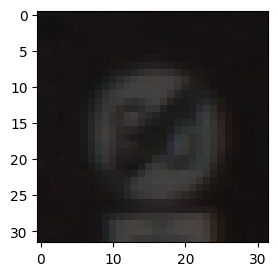

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)
print(y_train[index])

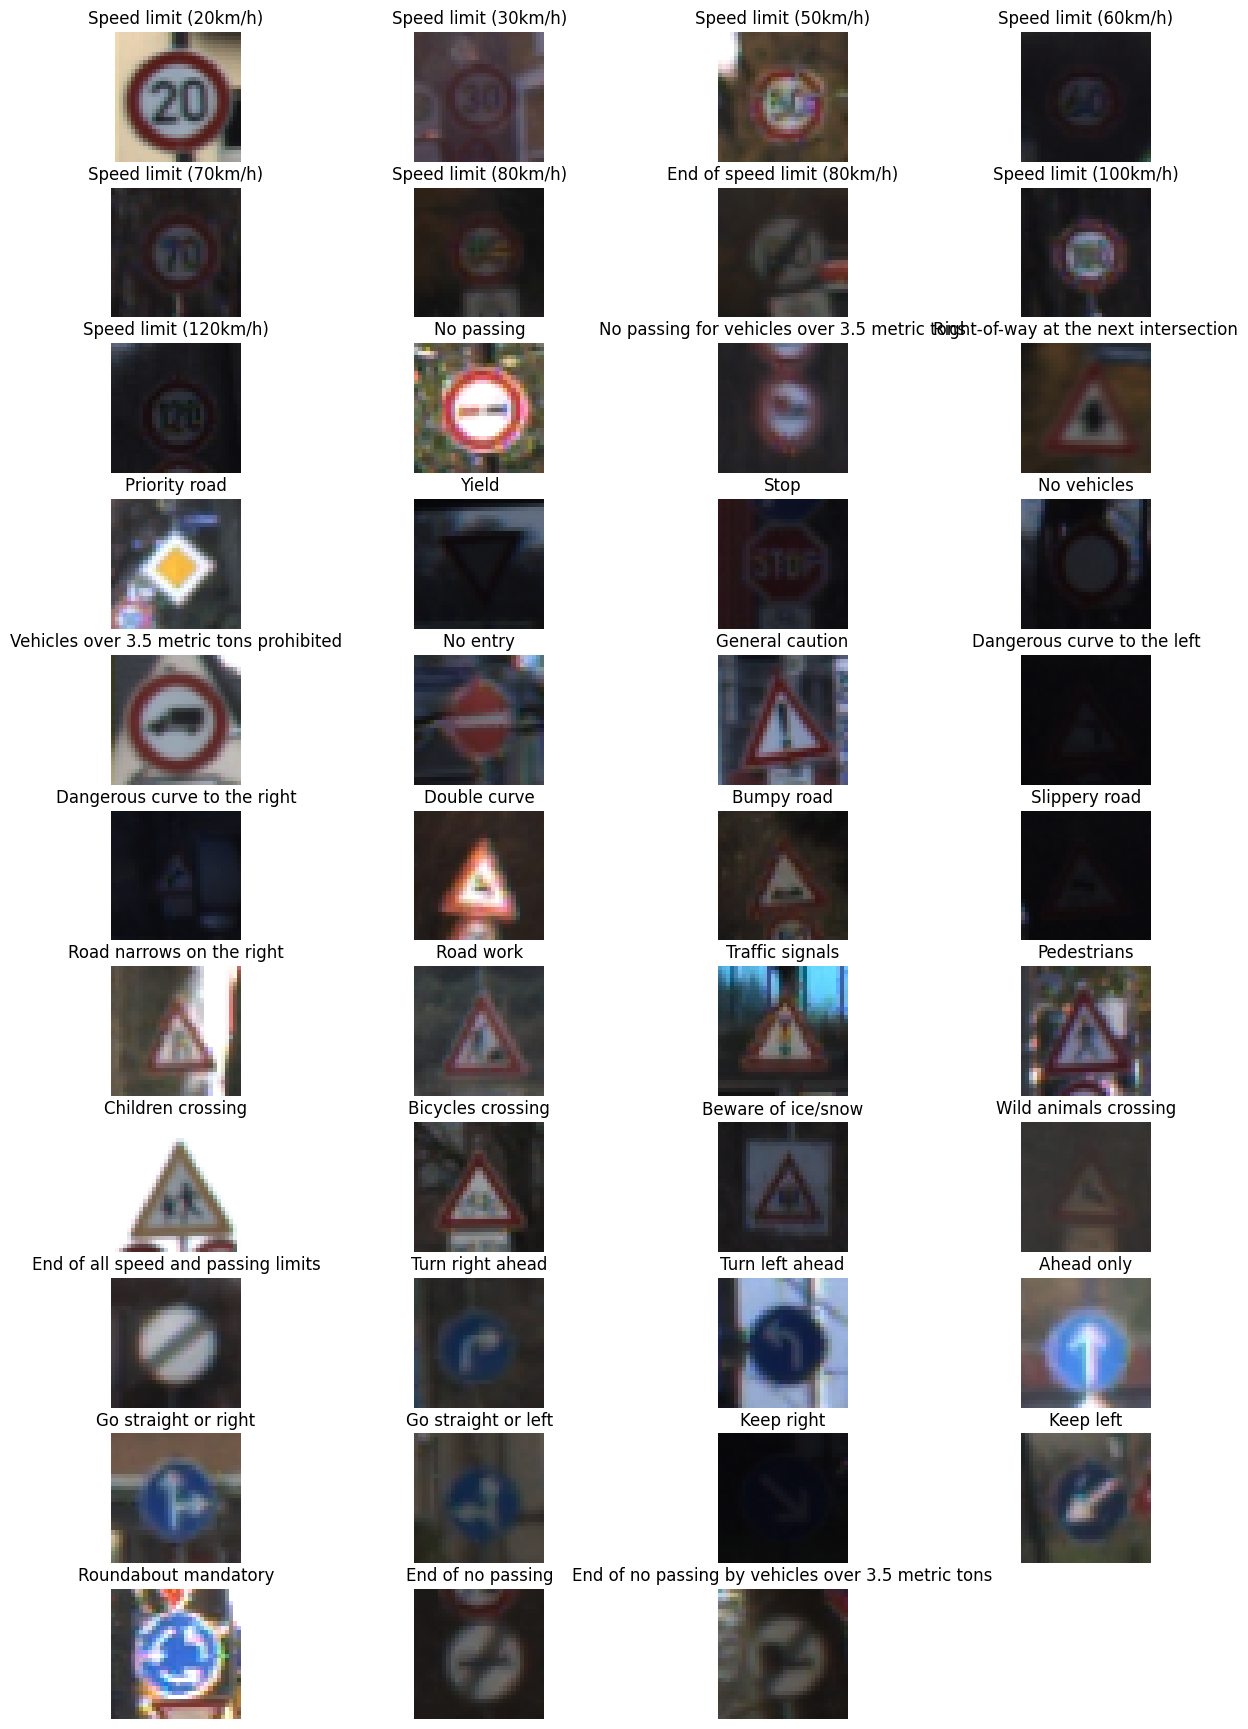

In [5]:
import csv
all_labels = []

#Select workbook
with open('/content/drive/MyDrive/Self-driving/Traffic_sign_classifier/sign_name.csv', 'r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV)

    for row in readCSV:
        all_labels += [row[1]]

num_of_samples=[]
plt.figure(figsize=(15, 30))
for i in range(0, n_classes):
    plt.subplot(15, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(all_labels[i])
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

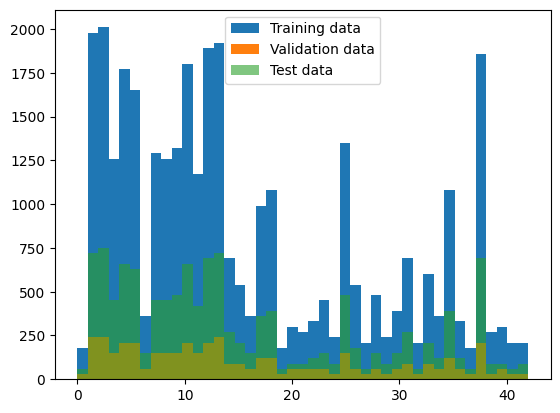

In [6]:
# Plot histogram
a = y_train
b = y_valid
c = y_test
bins = n_classes

plt.hist(a, bins, alpha = 1.0, label='Training data')
plt.hist(b, bins, alpha = 1.0, label='Validation data')
plt.hist(c, bins, alpha = 0.6, label='Test data')
plt.legend(loc='upper center')

plt.show()

#Pre-process the Data Set (normalization, grayscale, etc.)

In [7]:
import cv2
# Convert RGB to grayscale
def grayscale(img):
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray_image

In [8]:
# Histogram equalization to improve contrast
def equalize(img):
  equal_image = cv2.equalizeHist(img)
  return equal_image

In [9]:
# Normalizing Images for zero mean and equal variance to improve convergence rate
def normalize(img):
  norm_image = (img - 127.5) / 255
  return norm_image
  

In [10]:
def preprocess(original_image):
  # grayscale
  gray_image = grayscale(original_image)
    
  # equalize
  equal_image = equalize(gray_image)
  
  # normalize
  norm_image = normalize(equal_image)

  return norm_image

In [11]:
X_train_pp = np.array(list(map(preprocess, X_train)))
X_valid_pp = np.array(list(map(preprocess, X_valid)))
X_test_pp = np.array(list(map(preprocess, X_test)))

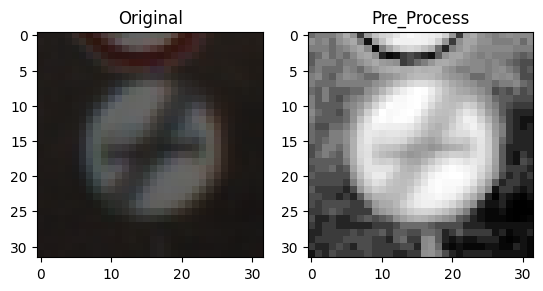

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(X_train[10])
ax1.set_title('Original')    
ax1.axis('ON')  # clear x- and y-axes
ax2.imshow(X_train_pp[10], cmap='gray')
ax2.set_title('Pre_Process')    
ax2.axis('ON')  # clear x- and y-axes
plt.show()

#Augmentation the Data Set

In [13]:
import imutils
import random

def aug_img(image):

    aug_data = [0]
    aug_images = [image]

# Rotating images
    # Rotate Positive
    degrees_positive = 10
    rotate_angle = random.randint(1,degrees_positive)
    rotate_image = image.copy()
    rotate_image = imutils.rotate(rotate_image, rotate_angle)
    aug_images.append(rotate_image)
    aug_data.append(rotate_angle)

    # Rotate Negative
    degrees_negative = 350
    rotate_angle = random.randint(degrees_negative,359)
    rotate_image = image.copy()
    rotate_image = imutils.rotate(rotate_image,rotate_angle)
    aug_images.append(rotate_image)
    aug_data.append(rotate_angle)

# Shift images
    # Shift horizontal 
    width_shift_range = 5
    width_shift_distance = random.randint(-1*width_shift_range,width_shift_range)
    shift_image = image.copy()
    shift_image = imutils.translate(shift_image,width_shift_distance,0)
    aug_images.append(shift_image)
    aug_data.append(width_shift_distance)

    # Shift vertical 
    height_shift_range = 5
    height_shift_distance = random.randint(-1*height_shift_range,height_shift_range)
    shift_image = image.copy()
    shift_image = imutils.translate(shift_image,0,height_shift_distance)
    aug_images.append(shift_image)
    aug_data.append(height_shift_distance)

    return aug_images, aug_data

In [14]:
# Convert the data into list type to use the method "append"
#X_train_pp = list(X_train_pp)
new_X_train = []
for image in X_train_pp:
  aug_images, aug_data = aug_img(image)
  new_X_train.extend(aug_images)

# Convert back to array
new_X_train = np.array(new_X_train)
    
# New number of training examples (after data augmentation)
new_n_train = len(new_X_train)
print("New number of training samples after data augmentation =", new_n_train)
print(new_X_train.shape)

# do the same for the labels y_train
new_y_train = []
# lengthen the list
for value in y_train:
  new_y = [value]*5
  new_y_train.extend(new_y)
    
# Convert back to array
new_y_train = np.array(new_y_train)

# New length of ground truth labels
new_n_train_y = len(new_y_train)
print("New length of ground truth labels =", new_n_train_y)
print(new_y_train.shape)

New number of training samples after data augmentation = 173995
(173995, 32, 32)
New length of ground truth labels = 173995
(173995,)


In [16]:
# Add a new axis
new_X_train = new_X_train[:, :, :, np.newaxis]
new_X_test = X_test_pp[:, :, :, np.newaxis]
new_X_valid = X_valid_pp[:, :, :, np.newaxis]
print(new_X_train.shape)
print(new_X_test.shape)
print(new_X_valid.shape)

(173995, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


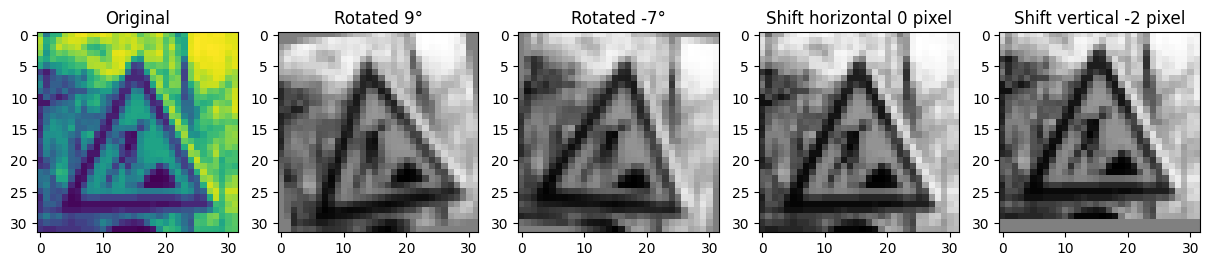

In [17]:
# Display an example for rotation
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15,7))

ax1.imshow(aug_images[0])
ax1.set_title('Original')    
ax1.axis('ON')  # clear x- and y-axes
ax2.imshow(aug_images[1], cmap = 'gray')
ax2.set_title('Rotated ' + str(aug_data[1]) + '°')    
ax2.axis('ON')  # clear x- and y-axes
ax3.imshow(aug_images[2], cmap = 'gray')
ax3.set_title('Rotated ' + str(aug_data[2] - 360) + '°')   
ax3.axis('ON')  # clear x- and y-axes
ax4.imshow(aug_images[3], cmap = 'gray')
ax4.set_title('Shift horizontal ' + str(aug_data[3]) + ' pixel')   
ax4.axis('ON')  # clear x- and y-axes
ax5.imshow(aug_images[4], cmap = 'gray')
ax5.set_title('Shift vertical ' + str(aug_data[4]) + ' pixel')   
ax5.axis('ON')  # clear x- and y-axes

plt.show()

In [18]:
#import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

EPOCHS = 150
BATCH_SIZE = 128
DROPOUT = 0.5

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

def model_lenet(input_shape,num_classes):
  model = tf.keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(units=120, activation='relu'),
    layers.Dense(units=84, activation='relu'),
    layers.Dense(units=num_classes, activation='softmax')
  ])
  return model

In [20]:
model = model_lenet(input_shape=(32, 32, 1), num_classes=n_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# training batch_size=128, epochs=10
conv = model.fit(new_X_train, new_y_train, batch_size=128, epochs=7, 
                    validation_data=(new_X_valid, y_valid))

Epoch 1/7
1360/1360 [==============================] - 121s 88ms/step - loss: 1.0097 - accuracy: 0.7208 - val_loss: 0.3782 - val_accuracy: 0.8955
Epoch 2/7
1360/1360 [==============================] - 117s 86ms/step - loss: 0.3147 - accuracy: 0.9071 - val_loss: 0.2670 - val_accuracy: 0.9213
Epoch 3/7
1360/1360 [==============================] - 120s 88ms/step - loss: 0.1922 - accuracy: 0.9422 - val_loss: 0.2859 - val_accuracy: 0.9215
Epoch 4/7
1360/1360 [==============================] - 117s 86ms/step - loss: 0.1371 - accuracy: 0.9579 - val_loss: 0.2380 - val_accuracy: 0.9376
Epoch 5/7
1360/1360 [==============================] - 117s 86ms/step - loss: 0.1028 - accuracy: 0.9682 - val_loss: 0.2121 - val_accuracy: 0.9442
Epoch 6/7
1360/1360 [==============================] - 117s 86ms/step - loss: 0.0802 - accuracy: 0.9748 - val_loss: 0.2009 - val_accuracy: 0.9542
Epoch 7/7
1360/1360 [==============================] - 115s 85ms/step - loss: 0.0668 - accuracy: 0.9786 - val_loss: 0.2548 -

In [23]:
acc = [conv.history['accuracy'], conv.history['val_accuracy']]
loss = [conv.history['loss'], conv.history['val_loss']]
epoch =np.linspace(0, 10/len(acc[0]), 10)

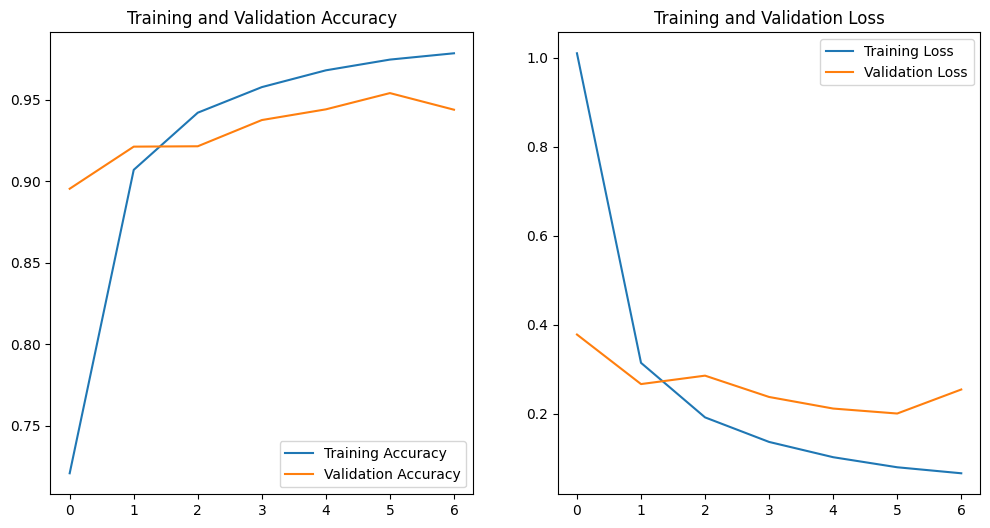

In [24]:
epoch = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot( acc[0], label='Training Accuracy')
plt.plot( acc[1], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot( loss[0], label='Training Loss')
plt.plot( loss[1], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#STEP 3: Test a Model on New Images

In [25]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

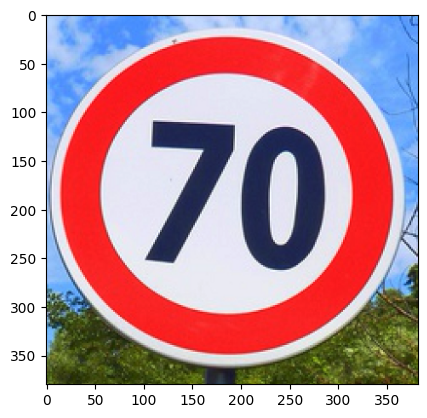

In [26]:
# predict labels for the test set
test_image_path='/content/drive/MyDrive/Self-driving/Traffic_sign_classifier/signs/example_3.png'
img = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to 32x32
    resized = cv2.resize(gray, (32, 32))
    # Normalize the image to have zero mean and unit variance
    normalized = (resized - 128) / 128
    # Reshape the image to a 4D array with a single channel
    reshaped = normalized.reshape(1, 32, 32, 1)
    return reshaped

preprocessed = preprocess_image(img)
# Classify the image using the LeNet model
prediction = model.predict(preprocessed)
# Print the predicted class label and confidence score
class_label = np.argmax(prediction)
confidence_score = np.max(prediction)
print(f"Class label: {class_label}, Confidence score: {confidence_score}")

1/1 [==============================] - 0s 25ms/step
Class label: 3, Confidence score: 0.999795138835907
